# Yelp_Project_Data_Explore

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
review = pd.read_csv('/Users/zhanfengzhao/Desktop/final_dataset.csv')

In [3]:
review.head(5)

,Unnamed: 0,review_id,text,stars
0,48469,Nh3b72ycaDuPp9JzKHUt5A,I love this store. Ive been shopping here for ...,5.0
1,263807,j-4-gLG0VkXGnS1zgeQfew,I have ate a lot of burgers in my time. This i...,5.0
2,181423,bs2CF6EJI9jK6KnTXPKyNw,I spent 3 months searching for a dog walker wh...,5.0
3,58676,nUCE_Nqidcxs-zCUvz0aJw,Just stayed here for a second time and overall...,4.0
4,284908,OrBX9I8-QxIvaHG4euw4cQ,For right now I would have to rate this specif...,1.0


In [4]:
review.shape

(106717, 4)

Text(0, 0.5, 'Count')

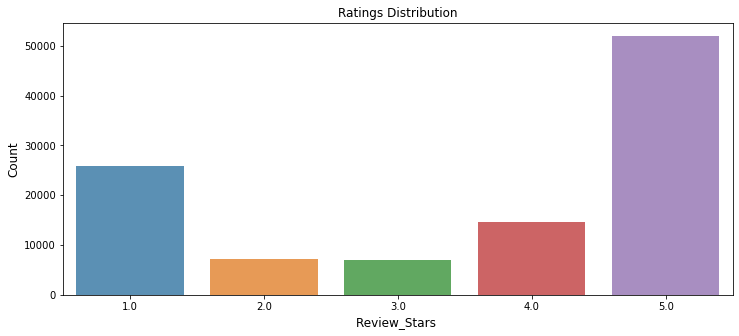

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
x = review['stars'].value_counts().index
y = review['stars'].value_counts().values
plt.figure(figsize=(12,5))
ax= sns.barplot(x, y,data= review,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Review_Stars ', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [6]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import re

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhanfengzhao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
def clean_review(df):
    a = df['text'].str.lower().str.cat(sep=' ')
    b = re.sub('[^A-Za-z]+', ' ', a)
    stop_words = list(stopwords.words('english')) 
    word_tokens = word_tokenize(b)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]
    cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]  
    return cleaned_data_title
def wc(data,title):
    plt.figure(figsize = (10,10))
    plt.title(title, fontsize=40,color='red')
    wc = WordCloud(background_color = 'white', max_words = 100,  max_font_size = 50,)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [26]:
from wordcloud import WordCloud, STOPWORDS

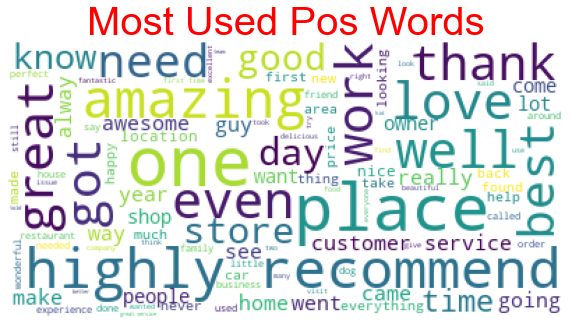

In [27]:
pos_data=clean_review(review[review.stars==5.0])
wc(pos_data,'Most Used Pos Words')

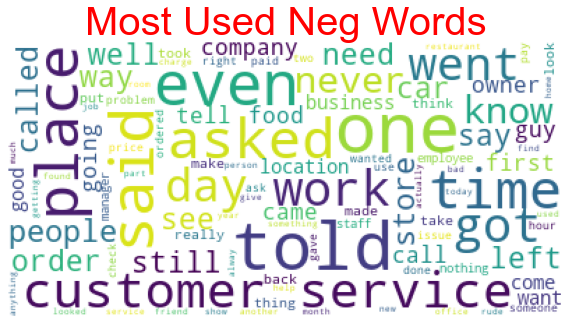

In [28]:
neg_data=clean_review(review[review.stars==1.0])
wc(neg_data,'Most Used Neg Words')

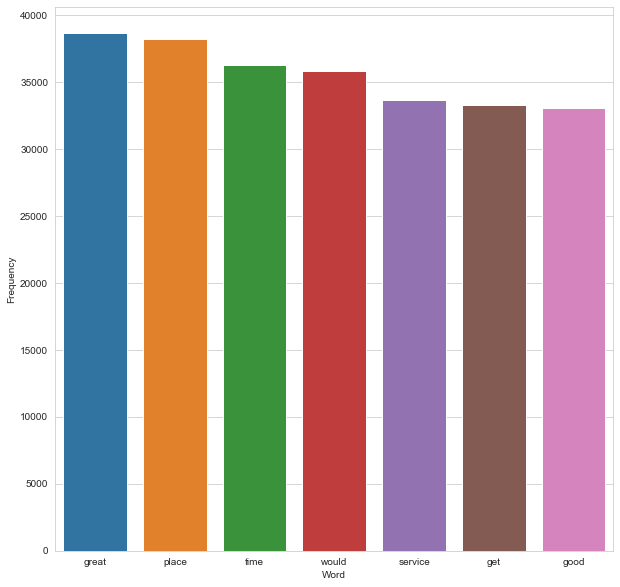

In [29]:
top_N = 100
cleaned_data_title=clean_review(review)
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

<AxesSubplot:xlabel='stars', ylabel='Text_length'>

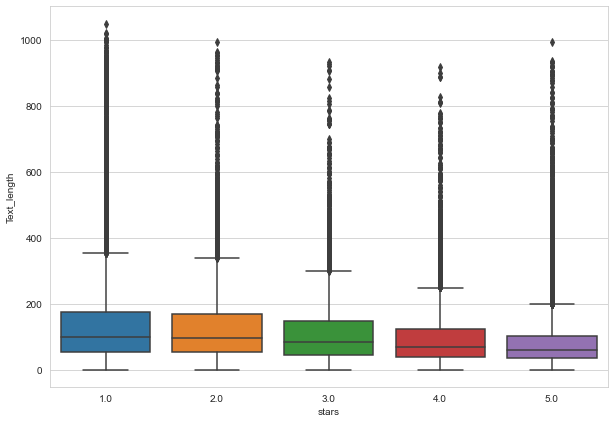

In [37]:
review['Text_length'] = review.text.apply(lambda x:len(str(x).split()))
plt.figure(figsize = (10,7))
sns.boxplot(x = 'stars', y = 'Text_length', data = review)